### Redes Bayesianas
#### Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [2]:
np.random.seed(42)
n_samples = 100000
data = pd.DataFrame({
    "Criticas positivas": np.random.choice(["Alta", "Baja"], size=n_samples, p=[0.8,0.2]),
    "Plataforma": np.random.choice(["Consola","PC"], size=n_samples, p=[0.4, 0.6]),
    "Amigos juegan": np.random.choice(["Si","No"], size=n_samples, p=[0.9,0.1])
})


In [5]:
# High reviews + Console + Friends play
data.loc[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'Si'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.85, 0.15], size=len(data[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'Si')]))

# High reviews + Console + Friends don't play
data.loc[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'No'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.60, 0.40], size=len(data[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'No')]))

# High reviews + PC + Friends play
data.loc[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'Si'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.80, 0.20], size=len(data[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'Si')]))

# High reviews + PC + Friends don't play
data.loc[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'No'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.55, 0.45], size=len(data[(data['Criticas positivas'] == 'Alta') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'No')]))

# Low reviews + Console + Friends play
data.loc[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'Si'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.50, 0.50], size=len(data[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'Si')]))

# Low reviews + Console + Friends don't play
data.loc[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'No'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.15, 0.85], size=len(data[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'Consola') & (data['Amigos juegan'] == 'No')]))

# Low reviews + PC + Friends play
data.loc[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'Si'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.45, 0.55], size=len(data[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'Si')]))

# Low reviews + PC + Friends don't play
data.loc[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'No'), 'Compra'] = \
    np.random.choice(['Si', 'No'], p=[0.10, 0.90], size=len(data[(data['Criticas positivas'] == 'Baja') & (data['Plataforma'] == 'PC') & (data['Amigos juegan'] == 'No')]))


In [6]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(data[["Criticas positivas", "Plataforma", "Amigos juegan"]])
y = data["Compra"].map({"No":0,"Si":1})

In [7]:
model = CategoricalNB()
model.fit(X,y)
combinations = pd.DataFrame({
    'Criticas positivas': ['Alta', 'Alta', 'Alta', 'Alta', 'Baja', 'Baja', 'Baja', 'Baja'],
    'Plataforma': ['Consola', 'Consola', 'PC', 'PC', 'Consola', 'Consola', 'PC', 'PC'],
    'Amigos juegan': ['Si', 'No', 'Si', 'No', 'Si', 'No', 'Si', 'No']
})
X_new = encoder.transform(combinations)
probs = model.predict_proba(X_new)

In [11]:
combinations['P(Compra = No)'] = probs[:, 0]
combinations['P(Compra = Si)'] = probs[:, 1]

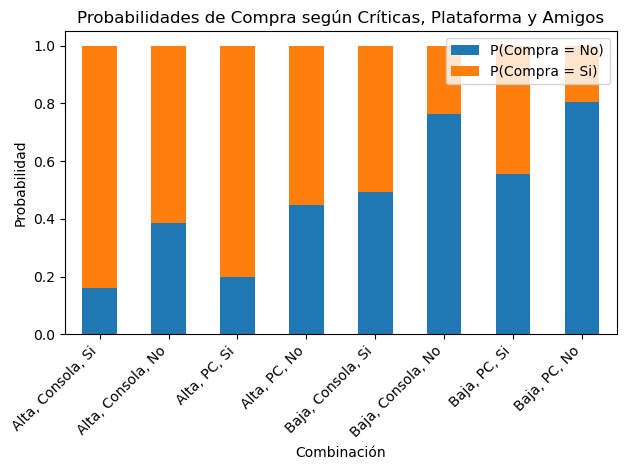

In [12]:
# Combine all three variables into a single label for the x-axis
combinations['Etiqueta'] = combinations.apply(
    lambda row: f"{row['Criticas positivas']}, {row['Plataforma']}, {row['Amigos juegan']}", 
    axis=1
)

# Plot the probabilities
combinations.plot(x='Etiqueta', y=['P(Compra = No)', 'P(Compra = Si)'], kind='bar', stacked=True)
plt.title('Probabilidades de Compra según Críticas, Plataforma y Amigos')
plt.xlabel('Combinación')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45, ha='right')  # ha='right' helps with readability
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('probabilidades_condicionales_compra_naive_bayes.png')
plt.show()